In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts
import random
from scipy.stats import sem
import sklearn.datasets as dta
from scipy.stats import linregress

In [2]:
#file test
kaggle_anime_df = "data/Anime_csv.csv"

In [3]:
kaggle_anime_df


'data/Anime_csv.csv'

In [4]:
anime_metadata = pd.read_csv(kaggle_anime_df)
anime_metadata.head(2)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,1-Sep-01,Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379


In [5]:
anime_metadata.Score

0           8.78
1           8.39
2           8.24
3           7.27
4           6.98
          ...   
17557    Unknown
17558    Unknown
17559    Unknown
17560    Unknown
17561    Unknown
Name: Score, Length: 17562, dtype: object

In [6]:
# anime_metadata.Score = anime_metadata.Score.astype(float)

# this is why we need to remove unkowns first^^^^

In [7]:
cleaned_anime_df= anime_metadata[anime_metadata.Score != 'Unknown']
cleaned_anime_df.head(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,1-Sep-01,Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226,14904,22811,16734,6206,2621,795,336,140,151
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,...,11829,16309,20008,13062,5574,3148,1339,484,278,321
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,TV,52,"Sep 11, 2002 to Sep 10, 2003",Fall 2002,...,1123,1777,3102,3075,1286,602,218,88,31,32
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Unknown,頭文字〈イニシャル〉D FOURTH STAGE,TV,24,"Apr 17, 2004 to Feb 18, 2006",Spring 2004,...,10948,15820,22379,12912,3874,1236,369,97,48,259
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",Monster,モンスター,TV,74,"Apr 7, 2004 to Sep 28, 2005",Spring 2004,...,77350,60652,43459,22045,8861,4381,2086,882,593,1177


In [8]:
# cleaned_anime_df.dtypes

In [9]:
# cleaned_anime_df.Score = cleaned_anime_df.Score.astype(float, errors = 'raise')
cleaned_anime_df.Score = cleaned_anime_df.Score.astype(float)
cleaned_anime_df.Score

C:\Users\burns\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
17504    6.59
17505    7.52
17512    6.83
17513    4.81
17552    6.52
Name: Score, Length: 12421, dtype: float64

In [10]:
cleaned_anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [11]:
cleaned_anime_df.Members

0        1251960
1         273145
2         558913
3          94683
4          13224
          ...   
17504      18161
17505        832
17512        540
17513      13070
17552      10722
Name: Members, Length: 12421, dtype: int64

In [12]:
# Cloumns we want to get rid of

# 'Japanese name', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Durations', 'Ranked', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped','Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'

In [13]:
#We actually want to keep the "Score 1 - 10" columns. We need to combine the columns in order to obtai the number of ratings each show/movie received

In [14]:
# dropping additional columns

# cleaned_anime_df.drop('Japanese name', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Durations', 'Ranked', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped','Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1')

# drop function can only take up to 8
cleaned_anime_df= cleaned_anime_df.drop(['Japanese name', 'Aired', 'Premiered', 'Producers', 'Licensors','Plan to Watch'], axis=1)
cleaned_anime_df= cleaned_anime_df.drop(['Duration', 'Ranked', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped'], axis=1)
# cleaned_anime_df= cleaned_anime_df.drop(['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4'], axis=1)
# cleaned_anime_df= cleaned_anime_df.drop(['Score-3', 'Score-2', 'Score-1'], axis=1)
cleaned_anime_df

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Sunrise,Original,R - 17+ (violence & profanity),...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Bones,Original,R - 17+ (violence & profanity),...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Madhouse,Manga,PG-13 - Teens 13 or older,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Sunrise,Original,PG-13 - Teens 13 or older,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Toei Animation,Manga,PG - Children,...,312,529,1242,1713,1068,634,265,83,50,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,ONA,4,Unknown,Original,PG-13 - Teens 13 or older,...,367,257,616,1422,1433,631,165,73,44,43
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,Music,1,"10Gauge, Studio DURIAN",Original,G - All Ages,...,67,73,112,112,38,10,3,1,2,1
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Special,1,Unknown,Game,PG - Children,...,15,17,16,29,26,10,1,Unknown,3,Unknown
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,Special,1,CloverWorks,Manga,R - 17+ (violence & profanity),...,188,141,317,565,998,1542,831,516,336,722


In [15]:
cleaned_anime_df.dtypes


MAL_ID            int64
Name             object
Score           float64
Genres           object
English name     object
Type             object
Episodes         object
Studios          object
Source           object
Rating           object
Popularity        int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

In [16]:
# how many "Uknowns in Sore fields?"
(cleaned_anime_df['Score-1']=='Unknown').sum()

7

In [17]:
cleaned_anime_df= cleaned_anime_df.replace({'Score-9': 'Unknown',
                         'Score-8': 'Unknown',
                         'Score-4': 'Unknown',
                         'Score-3': 'Unknown',
                         'Score-2': 'Unknown',
                         'Score-1': 'Unknown'}, 0)


In [18]:
cleaned_anime_df.loc[cleaned_anime_df['Score-9']== 'Unknown']

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1


In [19]:
cleaned_anime_df= cleaned_anime_df.astype({'Score-10': 'float',
                                          'Score-9': 'float',
                                          'Score-8': 'float',
                                          'Score-7': 'float',
                                          'Score-6': 'float',
                                          'Score-5': 'float',
                                          'Score-4': 'float',
                                          'Score-3': 'float',
                                          'Score-2': 'float',
                                          'Score-1': 'float'})
# cleaned_anime_df= cleaned_anime_df.astype({'Score-10': 'float'})
cleaned_anime_df.dtypes

MAL_ID            int64
Name             object
Score           float64
Genres           object
English name     object
Type             object
Episodes         object
Studios          object
Source           object
Rating           object
Popularity        int64
Score-10        float64
Score-9         float64
Score-8         float64
Score-7         float64
Score-6         float64
Score-5         float64
Score-4         float64
Score-3         float64
Score-2         float64
Score-1         float64
dtype: object

In [20]:
# Next step is to combine all of the Score columns in order to obtain the number of ratings per show
new_column = cleaned_anime_df['Score-10'] + cleaned_anime_df['Score-9'] + cleaned_anime_df['Score-8'] + cleaned_anime_df['Score-7'] +\
cleaned_anime_df['Score-6'] + cleaned_anime_df['Score-5'] + cleaned_anime_df['Score-4'] + cleaned_anime_df['Score-3'] +\
cleaned_anime_df['Score-2'] + cleaned_anime_df['Score-1']
new_column

0        641705.0
1        160349.0
2        286146.0
3         39094.0
4          5923.0
           ...   
17504      5051.0
17505       419.0
17512       117.0
17513      6156.0
17552      4715.0
Length: 12421, dtype: float64

In [21]:
cleaned_anime_df['Number of Ratings']= new_column

In [22]:
cleaned_anime_df

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Number of Ratings
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Sunrise,Original,R - 17+ (violence & profanity),...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,641705.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Bones,Original,R - 17+ (violence & profanity),...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,160349.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Madhouse,Manga,PG-13 - Teens 13 or older,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,286146.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Sunrise,Original,PG-13 - Teens 13 or older,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,39094.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Toei Animation,Manga,PG - Children,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,5923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,ONA,4,Unknown,Original,PG-13 - Teens 13 or older,...,257.0,616.0,1422.0,1433.0,631.0,165.0,73.0,44.0,43.0,5051.0
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,Music,1,"10Gauge, Studio DURIAN",Original,G - All Ages,...,73.0,112.0,112.0,38.0,10.0,3.0,1.0,2.0,1.0,419.0
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Special,1,Unknown,Game,PG - Children,...,17.0,16.0,29.0,26.0,10.0,1.0,0.0,3.0,0.0,117.0
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,Special,1,CloverWorks,Manga,R - 17+ (violence & profanity),...,141.0,317.0,565.0,998.0,1542.0,831.0,516.0,336.0,722.0,6156.0


In [23]:
# Now we can clear the Score-X columns
cleaned_anime_df= cleaned_anime_df.drop(['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4'], axis=1)
cleaned_anime_df= cleaned_anime_df.drop(['Score-3', 'Score-2', 'Score-1'], axis=1)
cleaned_anime_df

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Sunrise,Original,R - 17+ (violence & profanity),39,641705.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Bones,Original,R - 17+ (violence & profanity),518,160349.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Madhouse,Manga,PG-13 - Teens 13 or older,201,286146.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Sunrise,Original,PG-13 - Teens 13 or older,1467,39094.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Toei Animation,Manga,PG - Children,4369,5923.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,ONA,4,Unknown,Original,PG-13 - Teens 13 or older,3814,5051.0
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,Music,1,"10Gauge, Studio DURIAN",Original,G - All Ages,10869,419.0
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Special,1,Unknown,Game,PG - Children,11973,117.0
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,Special,1,CloverWorks,Manga,R - 17+ (violence & profanity),4398,6156.0


In [24]:
ratings_anime_df = cleaned_anime_df.sort_values('Score', ascending=False)
ratings_anime_df

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,9,989905.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),63,728435.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,TV,51,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,329,161812.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,5569,Tsui no Sora,2.26,Hentai,Unknown,OVA,1,Unknown,Visual novel,Rx - Hentai,7150,2489.0
387,413,Hametsu no Mars,2.23,"Sci-Fi, Horror",Mars of Destruction,OVA,1,WAO World,Visual novel,R - 17+ (violence & profanity),2216,37641.0
15172,38853,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",Unknown,TV,12,Visual Flight,Manga,PG-13 - Teens 13 or older,2350,20376.0
6967,13405,Utsu Musume Sayuri,2.01,"Comedy, Dementia",Striking Daughter,OVA,1,Unknown,Original,R+ - Mild Nudity,4367,10242.0


In [25]:
# look at df sorted by the number of ratings
ratings_anime_df.sort_values(by= ['Number of Ratings'], ascending= False)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,TV,37,Madhouse,Manga,R - 17+ (violence & profanity),1,1826691.0
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,TV,25,Wit Studio,Manga,R - 17+ (violence & profanity),2,1791099.0
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,TV,25,A-1 Pictures,Light novel,PG-13 - Teens 13 or older,4,1574372.0
10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,TV,12,Madhouse,Web manga,R - 17+ (violence & profanity),5,1478645.0
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15770,39716,"Blue Hawaii feat. Crush, Penomeco",5.79,Music,"Blue Hawaii feat. Crush, Penomeco",Music,1,Unknown,Original,PG-13 - Teens 13 or older,15167,103.0
15133,38795,I Want Nothing,5.39,"Dementia, Music",I Want Nothing,Music,1,Unknown,Original,PG-13 - Teens 13 or older,15311,103.0
12411,34422,Two Tea Two,5.14,Dementia,Two Tea Two,Movie,1,Decovocal,Original,R+ - Mild Nudity,14703,102.0
9252,24995,Moonfesta,5.87,"Music, Kids",Unknown,Music,1,Unknown,Original,G - All Ages,14567,102.0


<AxesSubplot:>

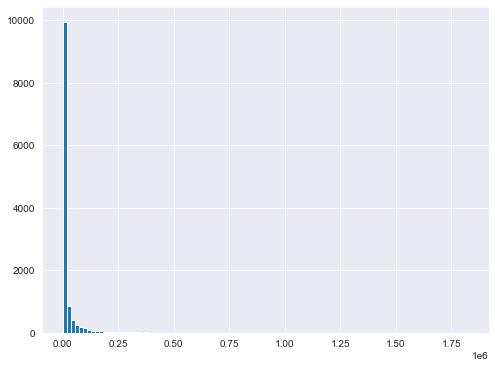

In [26]:
# observing scale/skew of data
sns.set_style('dark')

plt.figure(figsize=(8,6))
ratings_anime_df['Number of Ratings'].hist(bins=100)

In [27]:
# removing any show with a total rating count lower than 10,000
ratings_anime_df.drop(ratings_anime_df[ratings_anime_df['Number of Ratings'] < 10000].index, inplace=True)
# sorting ascending to check df
ratings_anime_df.sort_values(by= ['Number of Ratings'], ascending= True)


,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3142,3574,Switch,6.94,"Action, Mystery, Police",Unknown,OVA,2,Actas,Manga,PG-13 - Teens 13 or older,3331,10002.0
5740,9362,Hyakka Ryouran: Samurai Girls Specials,6.64,Ecchi,Unknown,Special,6,Arms,Light novel,R+ - Mild Nudity,3563,10011.0
7344,15895,Hiyokoi (2012),6.72,"Romance, School, Shoujo",Unknown,ONA,3,Production I.G,Manga,G - All Ages,3341,10014.0
6173,10350,Hakuouki Sekkaroku,7.65,"Action, Historical, Demons, Drama, Fantasy, Josei",Hakuoki ~Demon of the Fleeting Blossom~ A Memo...,OVA,6,Studio Deen,Visual novel,PG-13 - Teens 13 or older,3358,10014.0
14192,37338,Chuukan Kanriroku Tonegawa,7.14,"Comedy, Parody, Psychological, Drama, Seinen",Mr. Tonegawa:Middle Management Blues,TV,24,Madhouse,Manga,PG-13 - Teens 13 or older,2926,10018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,TV,12,Madhouse,Web manga,R - 17+ (violence & profanity),5,1478645.0
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,TV,25,A-1 Pictures,Light novel,PG-13 - Teens 13 or older,4,1574372.0
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,TV,25,Wit Studio,Manga,R - 17+ (violence & profanity),2,1791099.0


In [28]:
# Went from 12421 shows to 3321

<AxesSubplot:>

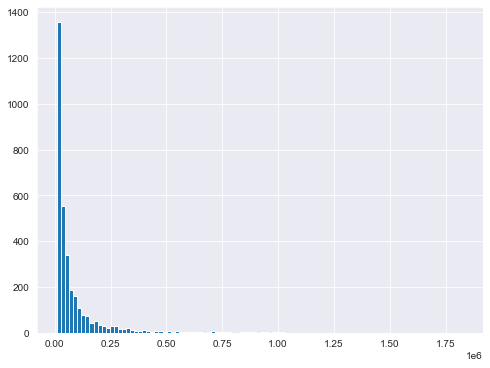

In [29]:
# observing scale/skew of data
sns.set_style('dark')

plt.figure(figsize=(8,6))
ratings_anime_df['Number of Ratings'].hist(bins=100)

In [30]:
# Vast majority of shows have received less than 250,000 ratings

<AxesSubplot:>

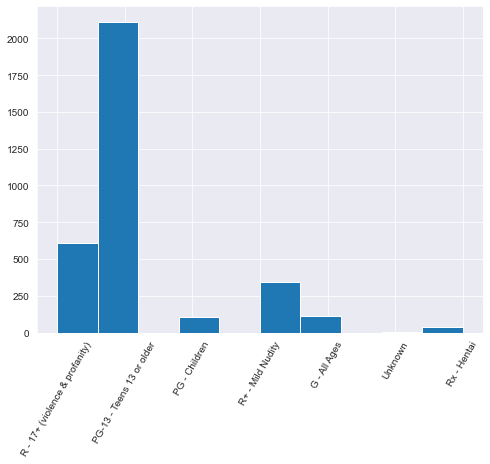

In [31]:
# Compare Score versus TV Rating
plt.figure(figsize=(8,6))
plt.xticks(rotation = 60)
ratings_anime_df['Rating'].hist()

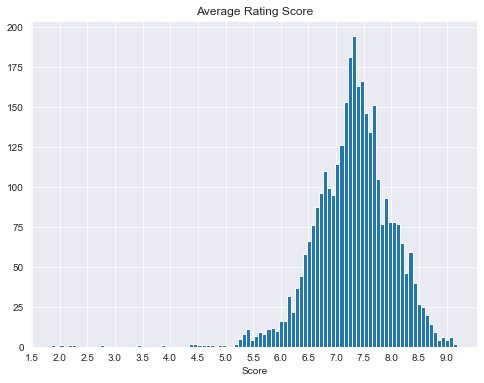

In [32]:
# Histogram of average rating
fig, label= plt.subplots(figsize=(8,6))

label.set(title= 'Average Rating Score',
         xlabel= 'Score')

# plt.figure(figsize=(8,6))
ratings_anime_df['Score'].hist(bins=100)

# increase xticks
plt.xticks([1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9])

plt.show()

# ^^^ Average rating tends to be skewed away from the very low numbers. Average appears to be around 7.25

### Now plot the average Score against rating count to compare the average score of an anime compared to the number of ratings submitted. Also do this against the "Popularity" which is the MAL ranking of shows based on the number of times a show has been added to a user's list

<Figure size 720x576 with 0 Axes>

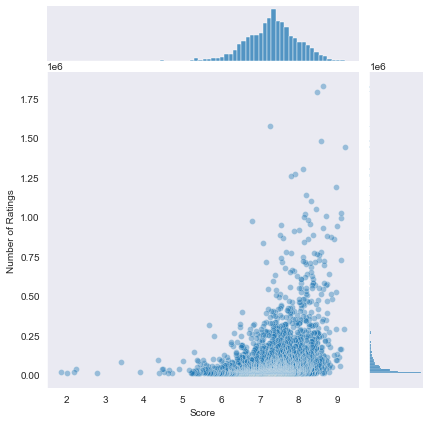

In [33]:
plt.figure(figsize=(10,8))

sns.jointplot(x='Score', y='Number of Ratings', data=ratings_anime_df, alpha=0.4)

<Figure size 720x576 with 0 Axes>

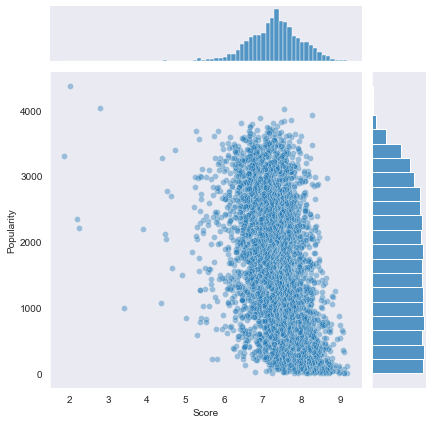

In [34]:
# Comparing now with "Popularity"
plt.figure(figsize=(10,8))

sns.jointplot(x='Score', y='Popularity', data=ratings_anime_df, alpha=0.4)

### This generally shows that anime with higher average ratings tend to have a higher number of ratings, compared with anime that have lower average ratings.

### What is fairly surprising: the MAL popularity rank appears to have little correlation with a shows score.

# Finding similarities between the anime shows/movies:

In [35]:
# adding animelist csv for UserID and individual ratings

In [36]:
anime_list = "data/animelist.csv"

In [37]:
# user_anime_df = pd.read_csv(anime_list)
# user_anime_df.head(2)


In [38]:
# test
# import pandas as pd
L = ['67', '242']
df_user= (pd.read_csv(anime_list, error_bad_lines=False) [lambda x: x['anime_id'].isin(L)])

In [39]:
df_user

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
2,0,242,10,1,4
1315,5,242,0,6,0
3341,14,67,0,6,0
7555,28,242,8,2,13
...,...,...,...,...,...
109215116,353367,67,0,4,1
109215804,353370,67,0,3,6
109217023,353379,242,8,2,13
109218752,353385,242,9,2,13


In [40]:
ratings_anime_df.head(2)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0


In [41]:
mal_id_list = ratings_anime_df.MAL_ID.tolist()


In [42]:
# now with full MAL ID as list

df_user= (pd.read_csv(anime_list, error_bad_lines=False) [lambda x: x['anime_id'].isin(mal_id_list)])

In [43]:
df_user

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1


In [44]:
df_user.drop(columns=['watching_status', 'watched_episodes'], axis = 1, inplace=True)
df_user.head()

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10


### we are going to first remove the bottom ~25% of users by times they voted. Then we will randomly selct a section of the users to create our matrix

In [45]:
# minimumrating= ratings_anime_df['Number of Ratings'].quantile(0.90)
# minimumrating

list_user=df_user['user_id'].value_counts()
list_user

312302    3321
147331    3321
122341    3321
283786    3321
297931    3321
          ... 
165876       1
13410        1
334123       1
55930        1
305550       1
Name: user_id, Length: 325424, dtype: int64

In [46]:
df_user['user_id'].value_counts().quantile(0.25)

90.0

In [47]:
quant_user= list_user.loc[list_user > 100]
quant_user

312302    3321
147331    3321
122341    3321
283786    3321
297931    3321
          ... 
113048     101
263930     101
166535     101
309104     101
232398     101
Name: user_id, Length: 236078, dtype: int64

In [48]:
quant_user.index

Int64Index([312302, 147331, 122341, 283786, 297931,  20807, 140590, 281232,
            131988, 252520,
            ...
             86173, 228361,   2435, 199107, 235639, 113048, 263930, 166535,
            309104, 232398],
           dtype='int64', length=236078)

In [55]:
# reduced_df_user= df_user.loc[df_user['user_id'] == quant_user]
reduced_df_user= df_user[df_user['user_id'].isin(quant_user.index)]

reduced_df_user

,user_id,anime_id,rating
74,1,37403,8
75,1,9989,0
76,1,24833,0
77,1,7674,7
78,1,34572,0
...,...,...,...
109224710,353403,4654,0
109224711,353403,14283,0
109224712,353403,16742,0
109224713,353403,1195,0


In [50]:
reduced_df_user.sort_values('user_id')

,user_id,anime_id,rating
74,1,37403,8
170,1,40902,7
169,1,28171,8
168,1,35760,10
167,1,25777,10
...,...,...,...
109224573,353403,10863,10
109224574,353403,849,9
109224575,353403,11757,10
109224551,353403,32281,10


### now to select random number of users


In [51]:
# unique user_ids
user_array = reduced_df_user['user_id'].unique()

In [52]:
user_array

array([     1,      2,      3, ..., 353398, 353400, 353403], dtype=int64)

In [53]:
user_list =user_array.tolist()

In [54]:
# now create a random REPRODUCIBLE sample
# sample_user = user_list.random.sample(n=1500, random_state=42)
sample_user = random.sample(user_list, 1500)  #random state?

In [59]:
# confirm you have random sample list 

# sample_user

In [58]:
rand_samp_df = reduced_df_user[reduced_df_user['user_id'].isin(sample_user)]

rand_samp_df

,user_id,anime_id,rating
75967,269,36456,0
75968,269,35821,0
75970,269,37259,0
75971,269,37517,0
75972,269,36431,0
...,...,...,...
109182256,353278,174,0
109182257,353278,1860,0
109182258,353278,949,0
109182260,353278,1293,0


In [60]:
ratings_anime_df

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,9,989905.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),63,728435.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,TV,51,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,329,161812.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7479,16608,Shitcom,2.78,"Comedy, Romance",Unknown,ONA,1,Unknown,Original,PG-13 - Teens 13 or older,4042,12257.0
387,413,Hametsu no Mars,2.23,"Sci-Fi, Horror",Mars of Destruction,OVA,1,WAO World,Visual novel,R - 17+ (violence & profanity),2216,37641.0
15172,38853,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",Unknown,TV,12,Visual Flight,Manga,PG-13 - Teens 13 or older,2350,20376.0
6967,13405,Utsu Musume Sayuri,2.01,"Comedy, Dementia",Striking Daughter,OVA,1,Unknown,Original,R+ - Mild Nudity,4367,10242.0


In [62]:
# ratings_anime_df['Number of Ratings'].quantile(0.30)

In [63]:
# ratings_anime_df.loc[ratings_anime_df['Number of Ratings'] >= 21000]

In [64]:
ratings_anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,9,989905.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),63,728435.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,TV,51,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,329,161812.0


In [65]:
# create df with only MAL_ID and title
title_df = pd.DataFrame().assign(MAL_ID=ratings_anime_df['MAL_ID'], Title=ratings_anime_df['Name'])
title_df

,MAL_ID,Title
3971,5114,Fullmetal Alchemist: Brotherhood
15926,40028,Shingeki no Kyojin: The Final Season
5683,9253,Steins;Gate
14963,38524,Shingeki no Kyojin Season 3 Part 2
9913,28977,Gintama°
...,...,...
7479,16608,Shitcom
387,413,Hametsu no Mars
15172,38853,Ex-Arm
6967,13405,Utsu Musume Sayuri


In [68]:
user_title_df = title_df.merge(rand_samp_df, left_on='MAL_ID', right_on='anime_id', how='left')
user_title_df

,MAL_ID,Title,user_id,anime_id,rating
0,5114,Fullmetal Alchemist: Brotherhood,541,5114,10
1,5114,Fullmetal Alchemist: Brotherhood,1038,5114,8
2,5114,Fullmetal Alchemist: Brotherhood,1227,5114,6
3,5114,Fullmetal Alchemist: Brotherhood,1494,5114,10
4,5114,Fullmetal Alchemist: Brotherhood,2065,5114,0
...,...,...,...,...,...
598431,3287,Tenkuu Danzai Skelter+Heaven,310696,3287,1
598432,3287,Tenkuu Danzai Skelter+Heaven,316412,3287,1
598433,3287,Tenkuu Danzai Skelter+Heaven,325736,3287,0
598434,3287,Tenkuu Danzai Skelter+Heaven,328296,3287,0


In [48]:
# sub_rate_df= ratings_anime_df

# cleaned_anime_df= cleaned_anime_df.drop(['Japanese name', 'Aired', 'Premiered', 'Producers', 'Licensors','Plan to Watch'], axis=1)


### Create matrix to find similarities in anime

In [70]:
# # cant compute   too large

user_anime_rating = user_title_df.pivot_table(index='user_id', columns='Title', values='rating')
user_anime_rating

Title,"""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Trilogy,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Unison,...,ef: A Tale of Melodies.,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE
user_id,,,,,,,,,,,,,,,,,,,,,
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
353003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ratings_anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,9,989905.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),63,728435.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,TV,51,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,329,161812.0


In [42]:
# mean rating of all anime
mean_rate= ratings_anime_df.Score.mean()
mean_rate

7.301291779584459

In [45]:
# can go back and do this up above with whole dataset

# minimumrating= ratings_anime_df['Number of Ratings'].quantile(0.90)
# minimumrating

minimum_rating= 10001

### Computing the weighted average

In [46]:
def weighted_rating(x, minimum_rating=minimum_rating, mean_rate=mean_rate):
    voters = x['Number of Ratings']
    avg_rating = x['Score']
    
    return (voters/(voters+minimum_rating) * avg_rating) + (minimum_rating/(minimum_rating+voters) * mean_rate)

In [47]:
# calculate the score w weighted average
ratings_anime_df['weighted_score']= ratings_anime_df.apply(weighted_rating, axis=1)

In [48]:
ratings_anime_df = ratings_anime_df.sort_values('weighted_score', ascending =False)

In [50]:
ratings_anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Studios,Source,Rating,Popularity,Number of Ratings,weighted_score
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,TV,64,Bones,Manga,R - 17+ (violence & profanity),3,1438767.0,9.176962
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,TV,16,MAPPA,Manga,R - 17+ (violence & profanity),119,288274.0,9.107343
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,9,989905.0,9.091909
6474,11061,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",Hunter x Hunter,TV,148,Madhouse,Manga,PG-13 - Teens 13 or older,12,1026866.0,9.082651
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),63,728435.0,9.075639
